In [45]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [111]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Define database and collection
db = client.scooters_DB
log=db.log

In [112]:
df=pd.DataFrame(log.find())
df['time']=pd.to_datetime(df['time'], unit='s')
df=df.set_index('time')
df.head()

,_id,jobname,last_updated,len,status,name,size
time,,,,,,,
2021-03-26 19:13:19.039094925,605e324f9a4d337eaa356329,P86XcW24n5B1amHeJJ4c3g,1616785870,985,success,lyft,7984
2021-03-26 19:13:20.540954828,605e32509a4d337eaa356f08,veCzP1JxVbJeTVpcNjX2Bw,1616785999,3038,success,lime,26736
2021-03-26 19:13:21.506874084,605e32519a4d337eaa357717,GWM1InMM8vaKhHgEvfx7ZA,1616786000,2062,success,spin,16560
2021-03-26 19:13:21.889271021,605e32519a4d337eaa357718,OjtAsrhJgKbTO2LTgUD0yA,NA,0,failed,skip,0
2021-03-26 19:13:22.551476002,605e32529a4d337eaa3579bc,SneyDFTD0xfJXscbQL3m4Q,NA,675,success,bird,5496


In [128]:
df[['name', 'status']].pivot_table(index='name', columns='status', aggfunc='size')

status,failed,success
name,,
bird,NaN,119.0
lime,NaN,119.0
lyft,NaN,119.0
razor,118.0,1.0
skip,119.0,NaN
spin,NaN,119.0
weather,NaN,119.0


In [125]:
len(df[df['name']=='weather'])*5/60

9.916666666666666

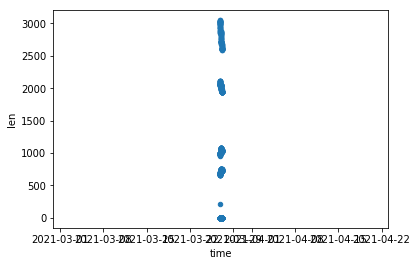

In [113]:
df['len'].reset_index().plot(x='time', y='len', kind='scatter')

(737875.8009148043, 737876.214136654)

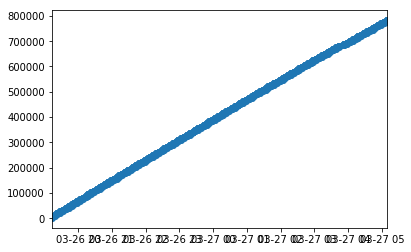

In [114]:
plt.scatter(x=df.index, y=df['len'].cumsum())
min_time=df.index.min()
max_time=df.index.max()
# plt.xlim([dt.date.fromisoformat('2021-03-26'), dt.date.fromisoformat('2021-03-27')])
plt.xlim([min_time, max_time])

In [115]:
dt.date.fromisoformat('2021-03-06')

datetime.date(2021, 3, 6)

In [118]:
df['len'].cumsum().max()*220/1000000

172.21996

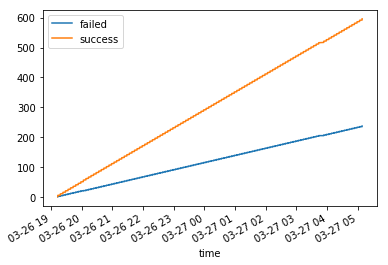

In [117]:
pd.get_dummies(df['status']).cumsum().plot()